In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.0
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 10s 1ms/step - loss: 2.7819 - acc: 0.4906 - val_loss: 1.7859 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.4560 - acc: 0.7007 - val_loss: 1.3347 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 0s 52us/step - loss: 1.0876 - acc: 0.7715 - val_loss: 1.1721 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.8666 - acc: 0.8137 - val_loss: 1.0727 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.6948 - acc: 0.8538 - val_loss: 1.0009 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.5590 - acc: 0.8821 - val_loss: 0.9844 - val_acc: 0.7900
Epoch 7/20
7982/7982 [==================

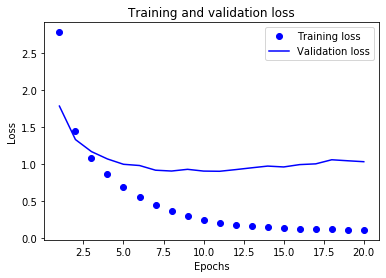

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

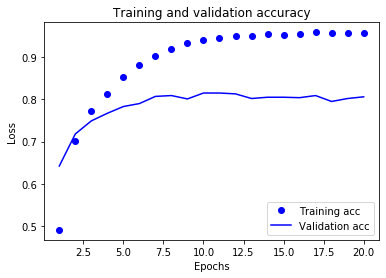

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 71us/step - loss: 2.5700 - acc: 0.5459 - val_loss: 1.7382 - val_acc: 0.6370
Epoch 2/9
7982/7982 [==============================] - 0s 49us/step - loss: 1.4071 - acc: 0.7036 - val_loss: 1.3110 - val_acc: 0.7290
Epoch 3/9
7982/7982 [==============================] - 0s 52us/step - loss: 1.0474 - acc: 0.7820 - val_loss: 1.1449 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.8252 - acc: 0.8286 - val_loss: 1.0430 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.6622 - acc: 0.8621 - val_loss: 0.9803 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 0s 51us/step - loss: 0.5329 - acc: 0.8860 - val_loss: 0.9735 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 0s 50us/step - loss: 0.4302 - acc: 0.9090 - val_loss: 0.9566 - val_acc: 0.8040
Epoch 8/9
7982

In [0]:
results

[1.0176388200435487, 0.7756010685663401]

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
# dir(model)

In [0]:
from sklearn.metrics import confusion_matrix 

In [0]:
print(confusion_matrix(one_hot_train_labels, one_hot_test_labels))

ValueError: ignored

**New Dataset Boston**

In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [0]:
train_data.shape

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [0]:
train_data.shape[1]

In [0]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  #mse= mean squared error
  return model

In [0]:
# K_ FOLD  Technique

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate( 
                            [train_data[:i * num_val_samples],
                            train_data[(i + 1) * num_val_samples:]],  
                            axis=0)
  
  partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i + 1) * num_val_samples:]],
                            axis=0)
  model = build_model()
  
  model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=1)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  
  all_scores.append(val_mae)